<h1>Supervised learning since we have data to test on?

In [1]:
import pandas as pd
import numpy as np

In [2]:
apple = pd.read_csv('apple.csv')
apple = apple[apple.columns[1:]]

In [3]:
apple.info()
#need to convert size to float
#add "type" dummy to match with google dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 9 columns):
app                 7189 non-null object
size                7189 non-null object
price               7189 non-null float64
rating_count        7189 non-null int64
rating_count_ver    7189 non-null int64
rating              7189 non-null float64
rating_ver          7189 non-null float64
content             7189 non-null object
category            7189 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 505.6+ KB


In [6]:
apple['size'] = apple['size'].apply(lambda x: x.replace(',','') if ',' in str(x) else x).apply(float)

In [4]:
apple['type'] = np.where(apple['price']==0.00,0,1)
#Free: 0
#Paid: 1

In [7]:
apple = apple[['app','size','price','type','category','content','rating','rating_count','rating_ver','rating_count_ver']]

In [8]:
apple.head()
#DV: rating - by version? visualization?
#IV: size, price (binary set), category, content, rating count(correlation?)

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
0,PAC-MAN Premium,100.788,3.99,1,Games,4+,4.0,21292,4.5,26
1,Evernote - stay organized,158.579,0.00,0,Productivity,4+,4.0,161065,3.5,26
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,0,Weather,4+,3.5,188583,4.5,2822
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,0,Shopping,12+,4.0,262241,4.5,649
4,Bible,92.774,0.00,0,Books & Reference,4+,4.5,985920,5.0,5320


In [9]:
apple[apple['rating_count']<0.5]

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
199,iLoan Calc (Loan calculator),3.375,3.99,1,Finance,4+,0.0,0,0.0,0
301,eBook: War and Peace,8.039,3.99,1,Books & Reference,9+,0.0,0,0.0,0
330,Jourist Weltübersetzer,147.067,7.99,1,Travel,4+,0.0,0,0.0,0
441,恵方コンパス.,41.207,0.00,0,Navigation,4+,0.0,0,0.0,0
452,「宅建士」過去問題《受験用》,24.445,3.99,1,Education,4+,0.0,0,0.0,0
515,Der Feueralarm,30.712,0.99,1,Entertainment,12+,0.0,0,0.0,0
531,iSleeping by iSommeil SARL,24.419,0.00,0,Medical,4+,0.0,0,0.0,0
553,Bowitter for iPhone,3.174,0.99,1,Social Networking,4+,0.0,0,0.0,0
575,出会い系アプリ i-Mail（アイメール）,3.834,0.00,0,Social Networking,17+,0.0,0,0.0,0
612,ファッション通販 ZOZOTOWN,43.611,0.00,0,Shopping,4+,0.0,0,0.0,0


In [10]:
#924 rows without rating -> useless
apple = apple[apple['rating_count']>=0.5]
apple.info()
#7189 entries to 6265 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6265 entries, 0 to 7188
Data columns (total 10 columns):
app                 6265 non-null object
size                6265 non-null float64
price               6265 non-null float64
type                6265 non-null int64
category            6265 non-null object
content             6265 non-null object
rating              6265 non-null float64
rating_count        6265 non-null int64
rating_ver          6265 non-null float64
rating_count_ver    6265 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 538.4+ KB


In [16]:
google = pd.read_csv('google.csv')
google = google[google.columns[1:]]

In [18]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 9 columns):
app             8196 non-null object
rating          8196 non-null float64
rating_count    8196 non-null int64
size            7027 non-null float64
installs        8196 non-null int64
type            8196 non-null object
price           8196 non-null float64
content         8196 non-null object
category        8196 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 576.4+ KB


In [ ]:
#some sizes are NaN
print(google['size'].size)
google['size'].count()
#about 1000 of them

In [25]:
google.groupby('type').size()

type
Free    7592
Paid     604
dtype: int64

In [26]:
#convert type to dummy: Free=0, Paid=1
google['type']=np.where(google['type']=='Free',0,1)

In [27]:
google.groupby('type').size()

type
0    7592
1     604
dtype: int64

In [28]:
google = google[['app','size','price','type','category','content','rating','rating_count','installs']]

In [29]:
google.head()
#DV could be rating & installs
#IV: size, price (binary as well), category, content, type
#adjust for rating_count?

,app,size,price,type,category,content,rating,rating_count,installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,0,Lifestyle,4+,4.1,159,10000
1,Coloring book moana,14.0,0.0,0,Lifestyle,4+,3.9,967,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,0,Lifestyle,4+,4.7,87510,5000000
3,Sketch - Draw & Paint,25.0,0.0,0,Lifestyle,12+,4.5,215644,50000000
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,0,Lifestyle,4+,4.3,967,100000


In [30]:
googlereviews = pd.read_csv('googlereviews.csv')
googlereviews = googlereviews[googlereviews.columns[1:]]
googlereviews.head()

,app,review
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...
1,10 Best Foods for You,This help eating healthy exercise regular basis
2,10 Best Foods for You,Works great especially going grocery store
3,10 Best Foods for You,Best idea us
4,10 Best Foods for You,Best way


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

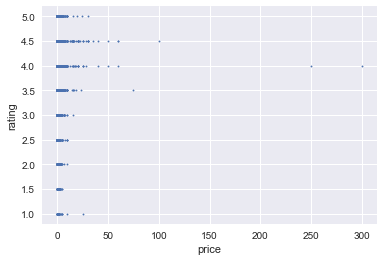

In [32]:
plt.scatter(apple['price'], apple['rating'], s=2)
plt.xlabel('price')
plt.ylabel('rating')

plt.show()

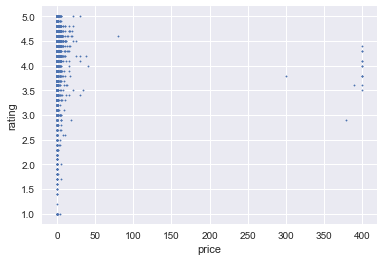

In [33]:
plt.scatter(google['price'], google['rating'], s=2)
plt.xlabel('price')
plt.ylabel('rating')

plt.show()

In [34]:
apple[apple.price > 50]

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver
115,Proloquo2Go - Symbol-based AAC,723.764,249.99,1,Education,4+,4.0,773,3.5,10
162,NAVIGON Europe,144.413,74.99,1,Navigation,4+,3.5,927,2.5,3
1136,Articulation Station Pro,425.919,59.99,1,Education,4+,4.5,294,5.0,130
1479,LAMP Words For Life,583.263,299.99,1,Education,4+,4.0,41,0.0,0
2181,Articulation Test Center Pro,174.737,59.99,1,Education,4+,4.5,29,0.0,0
2567,KNFB Reader,106.429,99.99,1,Productivity,4+,4.5,71,0.0,0
3237,FineScanner Pro - PDF Document Scanner App + OCR,63.974,59.99,1,Business,4+,4.0,100,4.5,4


In [35]:
google[google.price>50]
#based on the app names, most the extremely apps could be counted as 'useless' outliers

,app,size,price,type,category,content,rating,rating_count,installs
1675,Vargo Anesthesia Mega App,32.000,79.99,1,Medical,4+,4.6,92,1000
3177,most expensive app (H),1.500,399.99,1,Entertainment,4+,4.3,6,100
3303,💎 I'm rich,26.000,399.99,1,Lifestyle,4+,3.8,718,10000
3307,I'm Rich - Trump Edition,7.300,400.00,1,Lifestyle,4+,3.6,275,10000
4101,I am rich,1.800,399.99,1,Lifestyle,4+,3.8,3547,100000
4103,I am Rich Plus,8.700,399.99,1,Entertainment,4+,4.0,856,10000
4104,I am rich VIP,2.600,299.99,1,Lifestyle,4+,3.8,411,10000
4105,I Am Rich Premium,4.700,399.99,1,Finance,4+,4.1,1867,50000
4106,I am extremely Rich,2.900,379.99,1,Lifestyle,4+,2.9,41,1000
4107,I am Rich!,22.000,399.99,1,Finance,4+,3.8,93,1000


In [36]:
#take out price outliers
apple = apple[apple['price']<=50]
google = google[google['price']<=50]

In [37]:
print(apple.info())
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6258 entries, 0 to 7188
Data columns (total 10 columns):
app                 6258 non-null object
size                6258 non-null float64
price               6258 non-null float64
type                6258 non-null int64
category            6258 non-null object
content             6258 non-null object
rating              6258 non-null float64
rating_count        6258 non-null int64
rating_ver          6258 non-null float64
rating_count_ver    6258 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 537.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8180 entries, 0 to 8195
Data columns (total 9 columns):
app             8180 non-null object
size            7011 non-null float64
price           8180 non-null float64
type            8180 non-null int64
category        8180 non-null object
content         8180 non-null object
rating          8180 non-null float64
rating_count    8180 non-null int64
installs  

<h1>Classification</h1>
should we do horizontal grouping? we don't have many features - <b>ensemble learning random forest</b>

In [ ]:
# !pip install sklearn --upgrade

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

In [77]:
model = tree.DecisionTreeRegressor(max_depth=3)
#model = DecisionTreeRegressor(max_depth = 3)

<a href='https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree'><span style='color:red'>Sklearn: mixed input variables?</span></a>

In [82]:
#tree visualization
from IPython.display import Image
import pydotplus

<h4>create dummies</h4>

In [80]:
print(list(apple['category'].unique()))
type(apple['category'].unique()[0])

['Games', 'Productivity', 'Weather', 'Shopping', 'Books & Reference', 'Finance', 'Entertainment', 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business', 'Health & Fitness', 'Photo & Video', 'Navigation', 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Medical']


str

In [47]:
for i in apple['category'].unique():
    name = 'dummy_'+i
    apple[name] = np.where(apple['category']==i,1,0)

In [53]:
print(apple['content'].unique())
type(apple['content'].unique()[0])

['4+' '12+' '17+' '9+']


str

In [54]:
for i in apple['content'].unique():
    name = 'dummy_content_'+i
    apple[name] = np.where(apple['category']==i,1,0)

<h4><i>Maybe, </i>Popularity is also related to apps' name length</h4>

In [55]:
apple['app_name_len']=apple['app'].apply(lambda x: len(x))
apple.head()

,app,size,price,type,category,content,rating,rating_count,rating_ver,rating_count_ver,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+,app_name_len
0,PAC-MAN Premium,100.788,3.99,1,Games,4+,4.0,21292,4.5,26,...,0,0,0,0,0,0,0,0,0,15
1,Evernote - stay organized,158.579,0.00,0,Productivity,4+,4.0,161065,3.5,26,...,0,0,0,0,0,0,0,0,0,25
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524,0.00,0,Weather,4+,3.5,188583,4.5,2822,...,0,0,0,0,0,0,0,0,0,47
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512,0.00,0,Shopping,12+,4.0,262241,4.5,649,...,0,0,0,0,0,0,0,0,0,50
4,Bible,92.774,0.00,0,Books & Reference,4+,4.5,985920,5.0,5320,...,0,0,0,0,0,0,0,0,0,5


In [63]:
print(google['category'].unique())
type(google['category'].unique()[0])

['Lifestyle' 'Games' 'Photo & Video' 'Books & Reference' 'Business'
 'Social Networking' 'Education' 'Entertainment' 'Productivity' 'Finance'
 'Food & Drink' 'Health & Fitness' 'Medical' 'Shopping' 'Sports' 'Travel'
 'Utilities' 'Weather' 'News' 'Navigation']


str

In [64]:
for i in google['category'].unique():
    name = 'dummy_'+i
    google[name] = np.where(google['category']==i,1,0)

In [66]:
print(google['content'].unique())
type(google['content'].unique()[0])

['4+' '12+' '9+' '17+']


str

In [67]:
for i in google['content'].unique():
    name = 'dummy_content_'+i
    google[name] = np.where(google['content']==i,1,0)

In [68]:
google['app_name_len']=google['app'].apply(lambda x: len(x))
google.head()

,app,size,price,type,category,content,rating,rating_count,installs,dummy_Lifestyle,...,dummy_Travel,dummy_Utilities,dummy_Weather,dummy_News,dummy_Navigation,dummy_content_4+,dummy_content_12+,dummy_content_9+,dummy_content_17+,app_name_len
0,Photo Editor & Candy Camera & Grid & ScrapBook,19.0,0.0,0,Lifestyle,4+,4.1,159,10000,1,...,0,0,0,0,0,1,0,0,0,46
1,Coloring book moana,14.0,0.0,0,Lifestyle,4+,3.9,967,500000,1,...,0,0,0,0,0,1,0,0,0,19
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8.7,0.0,0,Lifestyle,4+,4.7,87510,5000000,1,...,0,0,0,0,0,1,0,0,0,50
3,Sketch - Draw & Paint,25.0,0.0,0,Lifestyle,12+,4.5,215644,50000000,1,...,0,0,0,0,0,0,1,0,0,21
4,Pixel Draw - Number Art Coloring Book,2.8,0.0,0,Lifestyle,4+,4.3,967,100000,1,...,0,0,0,0,0,1,0,0,0,37


In [69]:
google_index_dict = dict()
google_keys = range(len(google.columns))
google_values = list(google.columns)
for i in google_keys:
    google_index_dict[i]=google_values[i]

google_index_dict

{0: 'app',
 1: 'size',
 2: 'price',
 3: 'type',
 4: 'category',
 5: 'content',
 6: 'rating',
 7: 'rating_count',
 8: 'installs',
 9: 'dummy_Lifestyle',
 10: 'dummy_Games',
 11: 'dummy_Photo & Video',
 12: 'dummy_Books & Reference',
 13: 'dummy_Business',
 14: 'dummy_Social Networking',
 15: 'dummy_Education',
 16: 'dummy_Entertainment',
 17: 'dummy_Productivity',
 18: 'dummy_Finance',
 19: 'dummy_Food & Drink',
 20: 'dummy_Health & Fitness',
 21: 'dummy_Medical',
 22: 'dummy_Shopping',
 23: 'dummy_Sports',
 24: 'dummy_Travel',
 25: 'dummy_Utilities',
 26: 'dummy_Weather',
 27: 'dummy_News',
 28: 'dummy_Navigation',
 29: 'dummy_content_4+',
 30: 'dummy_content_12+',
 31: 'dummy_content_9+',
 32: 'dummy_content_17+',
 33: 'app_name_len'}

<h2>Apple</h2>

In [62]:
apple_index_dict = dict()
apple_keys = range(len(apple.columns))
apple_values = list(apple.columns)
for i in apple_keys:
    apple_index_dict[i]=apple_values[i]

apple_index_dict

{0: 'app',
 1: 'size',
 2: 'price',
 3: 'type',
 4: 'category',
 5: 'content',
 6: 'rating',
 7: 'rating_count',
 8: 'rating_ver',
 9: 'rating_count_ver',
 10: 'dummy_Games',
 11: 'dummy_Productivity',
 12: 'dummy_Weather',
 13: 'dummy_Shopping',
 14: 'dummy_Books & Reference',
 15: 'dummy_Finance',
 16: 'dummy_Entertainment',
 17: 'dummy_Utilities',
 18: 'dummy_Travel',
 19: 'dummy_Social Networking',
 20: 'dummy_Sports',
 21: 'dummy_Business',
 22: 'dummy_Health & Fitness',
 23: 'dummy_Photo & Video',
 24: 'dummy_Navigation',
 25: 'dummy_Education',
 26: 'dummy_Lifestyle',
 27: 'dummy_Food & Drink',
 28: 'dummy_News',
 29: 'dummy_Medical',
 30: 'dummy_content_4+',
 31: 'dummy_content_12+',
 32: 'dummy_content_17+',
 33: 'dummy_content_9+',
 34: 'app_name_len'}

<h3>Price --> Rating</h3>

In [74]:
#Rating as DV
#IV: size, price, rating count(??), category, content, length of name(??)
#should not have price and type together as they directly correlate with one another

train_a, test_a = train_test_split(apple, test_size = 0.3)


In [ ]:
x_train_a1 = train_a.iloc[0:,[1,2,7,
                              10,11,12,13,14,15,16,17,18,19,
                              20,21,22,23,24,25,26,27,28,29,
                              30,31,32,33,34]]
y_train_a1 = train_a[['rating']]
x_test_a1 = test_a.iloc[0:,[1,2,7,
                              10,11,12,13,14,15,16,17,18,19,
                              20,21,22,23,24,25,26,27,28,29,
                              30,31,32,33,34]]
y_test_a1 = test_a[['rating']]

In [75]:
x_train_a1.head()

,size,price,rating_count,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,dummy_Finance,dummy_Entertainment,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+,app_name_len
4016,29.283,0.00,891,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4396,145.756,0.00,201,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
3112,57.418,0.99,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
3184,312.962,2.99,10132,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
413,17.614,0.00,9142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [78]:
model.fit(x_train_a1,y_train_a1)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
# !pip install pydotplus --upgrade

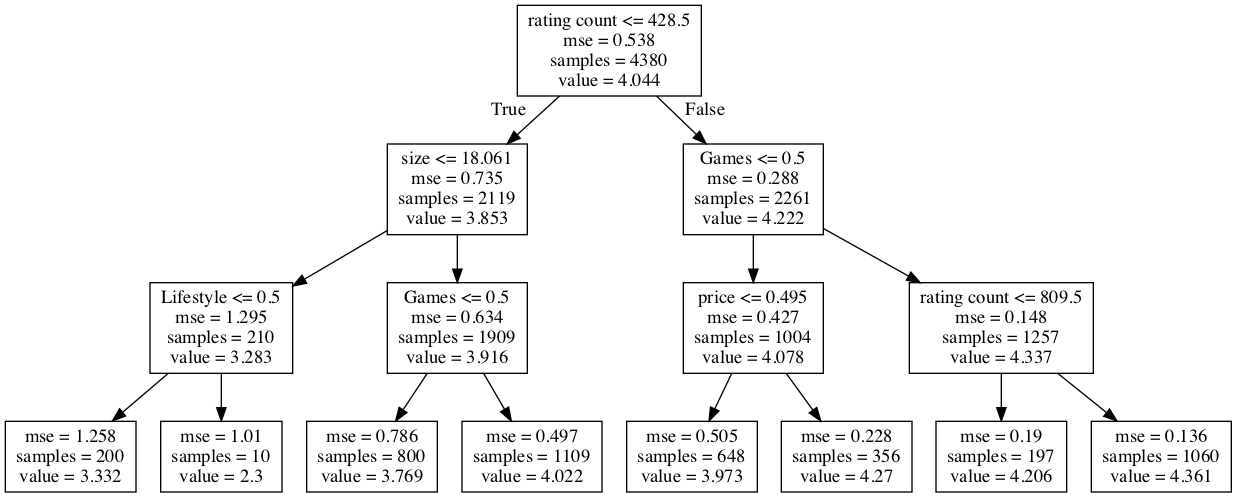

In [83]:
feature_names = ['size','price','rating count',
                 'Games', 'Productivity', 'Weather', 'Shopping', 'Books & Reference', 'Finance', 
                 'Entertainment', 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business', 
                 'Health & Fitness', 'Photo & Video', 'Navigation', 'Education', 'Lifestyle', 
                 'Food & Drink', 'News', 'Medical',
                 '4+','12+','17+','9+',
                 'name length']
# from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
# import pydotplus

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

#Need to figure out how to convert back the dummies
#Manually draw the tree elsewhere?

<h3>Price Type --> Rating</h3>

In [85]:
x_train_a2 = train_a.iloc[0:,[1,3,7,
                              10,11,12,13,14,15,16,17,18,19,
                              20,21,22,23,24,25,26,27,28,29,
                              30,31,32,33,34]]
y_train_a2 = train_a[['rating']]
x_test_a2 = test_a.iloc[0:,[1,3,7,
                              10,11,12,13,14,15,16,17,18,19,
                              20,21,22,23,24,25,26,27,28,29,
                              30,31,32,33,34]]
y_test_a2 = test_a[['rating']]

In [86]:
x_train_a2.head()

,size,type,rating_count,dummy_Games,dummy_Productivity,dummy_Weather,dummy_Shopping,dummy_Books & Reference,dummy_Finance,dummy_Entertainment,...,dummy_Education,dummy_Lifestyle,dummy_Food & Drink,dummy_News,dummy_Medical,dummy_content_4+,dummy_content_12+,dummy_content_17+,dummy_content_9+,app_name_len
4016,29.283,0,891,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4396,145.756,0,201,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
3112,57.418,1,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
3184,312.962,1,10132,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,44
413,17.614,0,9142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [87]:
model.fit(x_train_a2,y_train_a2)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

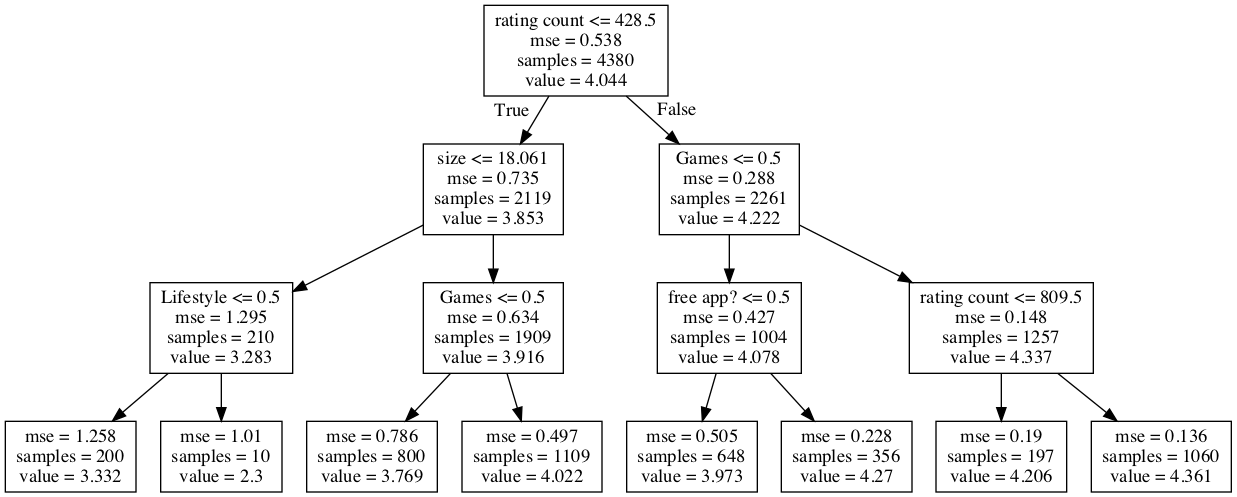

In [88]:
feature_names = ['size','free app?','rating count',
                 'Games', 'Productivity', 'Weather', 'Shopping', 'Books & Reference', 'Finance', 
                 'Entertainment', 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business', 
                 'Health & Fitness', 'Photo & Video', 'Navigation', 'Education', 'Lifestyle', 
                 'Food & Drink', 'News', 'Medical',
                 '4+','12+','17+','9+',
                 'name length']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h2>Google</h2>

In [ ]:
google.head()

In [ ]:
#Convert categorical into dummies

le.fit(list(google['category'].unique()))
google['dummy_category'] = le.transform(google['category'])
# le.inverse_transform(apple['category'])

le.fit(list(google['content'].unique()))
google['dymmy_content'] = le.transform(google['content'])

le.fit(list(google['type'].unique()))
google['dymmy_type'] = le.transform(google['type'])

google.head()

In [ ]:
#Rating & Installs as DV's
#IV: size, price/type, category, content
#should not have price and type together as they directly correlate with one another

train_g, test_g = train_test_split(google, test_size = 0.3)

<h3>Price --> Rating</h3>

In [ ]:
"""Price & Rating"""
#size, price, category, rating

x_train_g1 = train_g.iloc[0:,[1,2,9,10]]
y_train_g1 = train_g[['rating']]
x_test_g1 = test_g.iloc[0:,[1,2,9,10]]
y_test_g1 = test_g[['rating']]

In [ ]:
x_train_g1.head()

In [ ]:
# model.fit(x_train_g1,y_train_g1)

In [ ]:
feature_names = ['size','price','category','content rating']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h3>Price Type --> Rating

In [ ]:
"""Type & Rating"""
x_train_g2 = train_g.iloc[0:,[1,9,10,11]]
y_train_g2 = train_g[['rating']]
x_test_g2 = test_g.iloc[0:,[1,9,10,11]]
y_test_g2 = test_g[['rating']]

In [ ]:
x_train_g2.head()

In [ ]:
# model.fit(x_train_g2,y_train_g2)

In [ ]:
feature_names = ['size','category','content rating','price type']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h3>Price --> Number of Installs</h3>

In [ ]:
"""Price & Install"""
x_train_g3 = train_g.iloc[0:,[1,2,9,10]]
y_train_g3 = train_g[['installs']]
x_test_g3 = test_g.iloc[0:,[1,2,9,10]]
y_test_g3 = test_g[['installs']]

In [ ]:
y_train_g3.head()

In [ ]:
model.fit(x_train_g3,y_train_g3)

In [ ]:
feature_names = ['size','price','category','content rating']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h3>Price Type --> Number of Installs</h3>

In [ ]:
"""Type & Rating"""
x_train_g4 = train_g.iloc[0:,[1,9,10,11]]
y_train_g4 = train_g[['installs']]
x_test_g4 = test_g.iloc[0:,[1,9,10,11]]
y_test_g4 = test_g[['installs']]

In [ ]:
x_train_g4.head()

In [ ]:
model.fit(x_train_g4,y_train_g4)

In [ ]:
feature_names = ['size','category','content rating','price type']
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h1>Regression</h1>
<li>predict rating: apple & google</li>
<li>predict installs: google</li>

In [ ]:
print(len(google.index))
print(len(apple.index))

In [ ]:
#apple

train, test = train_test_split(apple, test_size = 0.3) #30% as test set
x_train = train.iloc[0:,0:60]
y_train = train[60] #single out the output feature
x_test = test.iloc[0:,0:60]
y_test = test[60]
y_train #trained result by index